# **🤖 Project 1: Spam Filter using Naive Bayes 🤖 **
**Introduction**

The objective for this project is to practice the usage of the most simple natural language processing (NLP) methods. We can achieve this by using machine learning algorithm such as Naive Bayes to detect, which emails are "spam" and which are "ham". We are using a dataset, which includes over 5000 emails that have label 0 = "actual email" or 1 = "spam email". You can find the dataset here: https://www.kaggle.com/datasets/rajnathpatel/multilingual-spam-data

First we have just an English version and down below we combine the dataset with a multilingual dataset.

Step 1: Import pandas 🐼 and download the dataset and inspect the first 10 rows 👨‍💻

In [24]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Spam Filter Project/emails.csv')
dataset.head(10)

,Text,Spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


Step 2: Count the distribution of the spam emails and actual emails. Create labels for the later purposes ➕

In [25]:
dataset['Spam'].value_counts()
labels = ['Actual EMAIL', 'SPAM EMAIL']

In [26]:
import pandas as pd
data_multi = pd.read_csv('/content/drive/MyDrive/Spam Filter Project/email_multilinqual.csv')
data_multi.head()

data_multi.columns

Index(['labels', 'text', 'text_hi', 'text_de', 'text_fr'], dtype='object')

Step 2: Converting Data in Pandas
 ➕

In [27]:
# custom functions to convert data in pandas
def convert_labels(row):
    if row['labels'] == 'ham':
        return 0
    else:
        return 1

data_multi['Spam'] = data_multi.apply(convert_labels, axis=1)

Step 3: Drop Unnecessary Columns🧮




In [28]:
data_multi = data_multi.drop('labels', axis=1)
data_multi = data_multi.drop('text_hi', axis=1)
data_multi = data_multi.drop('text', axis=1)
data_multi = data_multi.drop('text_de', axis=1)


data_multi = data_multi.rename(columns={"text_fr": "Text"})

Step 4: Combine Datasets **❎**

In [29]:
data = pd.concat([dataset, data_multi])

Step 5: Train, Test and Split 🚂 + 🧪 + 🪓 = 💯

In [30]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

# let's take a copy just in case of our DataFrame
test = data.copy()

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test['text_no_stopwords'] = test['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# let's see how our data looks now
test

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Spam,text_no_stopwords
0,Subject: naturally irresistible your corporate...,1,Subject: naturally irresistible corporate iden...
1,Subject: the stock trading gunslinger fanny i...,1,Subject: stock trading gunslinger fanny merril...
2,Subject: unbelievable new homes made easy im ...,1,Subject: unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,1,Subject: 4 color printing special request addi...
4,"Subject: do not have money , get software cds ...",1,"Subject: money , get software cds ! software c..."
...,...,...,...
5567,C'est la 2ème fois que nous avons essayé 2 con...,1,C'est la 2ème fois que nous avons essayé 2 con...
5568,Est-ce que ü b ira à l'esplanade en maison?,0,Est-ce que ü b ira à l'esplanade en maison?
5569,"Dommage, * était d'humeur pour ça. Donc... d'a...",0,"Dommage, * était d'humeur pour ça. Donc... d'a..."
5570,Le type a fait une saloperie mais j'ai agi com...,0,Le type fait une saloperie mais j'ai agi comme...


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()


In [32]:
# vectorizer turns text into numeric form
X = vectorizer.fit_transform(data['Text'])
Y = data['Spam'].values


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.18, random_state=45)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1627
           1       0.90      0.98      0.94       407

    accuracy                           0.98      2034
   macro avg       0.95      0.98      0.96      2034
weighted avg       0.98      0.98      0.98      2034



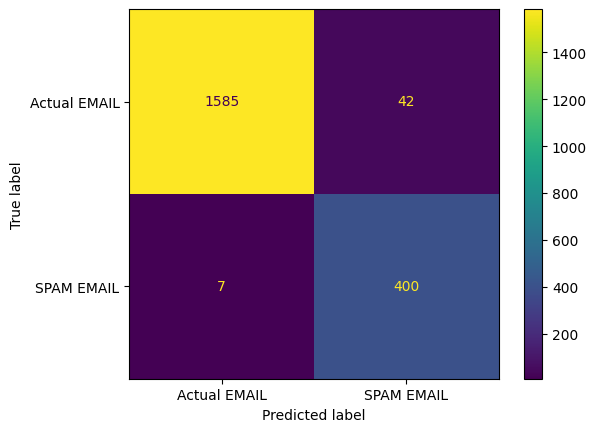

In [34]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#Creating the Classifier and Training the Model
mnb1 = MultinomialNB()
model1 = mnb1.fit(X_train, Y_train)

#Making predictions
training_predictions = model1.predict(X_train)
test_predictions = model1.predict(X_test)

#Printing the Classification Report
print(classification_report(Y_test, test_predictions))

#Creating a Confusion Matrix and Displaying It
cm = confusion_matrix(Y_test, test_predictions, labels=mnb1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()

**Analyzing the Result**

Overall, based on this report, the model appears to be performing well. It has high precision, recall, and F1-scores for both classes, indicating that it is making accurate predictions. It has slightly worse accuracy compared to the model with only one language, but the difference is subtle.

Time to dance for the results 🕺 + 🎵 = 💯


**Summary**

Additional methods used in V2
1. Removing unnessecary columns
2. Combining the tables
3. Using stopwords to create better results







